# 4 Modeling Random Walks, the Binomial Tree Method

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In [1]:
#import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import seaborn as sns
sns.set_style('darkgrid')

Let $u > 0$, $d < 0$, $0 \leq p \leq 1$, and let $K$ be the discrete probability distribution over $\{u, d\}$ with probability density function
$$
p(u) = p, \quad p(d) = 1 - p.
$$

The **1-step binomial tree model** with initial value $S_0$ is given by:
$$
S_1 =
\begin{cases}
S_0(1 + u) & \text{with probability } p, \\
S_0(1 + d) & \text{with probability } 1 - p.
\end{cases}
$$


In [2]:
# Define a function that creates the 1-step binomial tree model
def one_step_tree(S0,u,d,p):
    #S0 = initial stock price
    #u = up factor
    #d = down factor
    #p = probability of moving up
    probs = [p, 1-p]
    steps = [u, d]
    return S0*(1+np.random.choice(steps, p = probs))

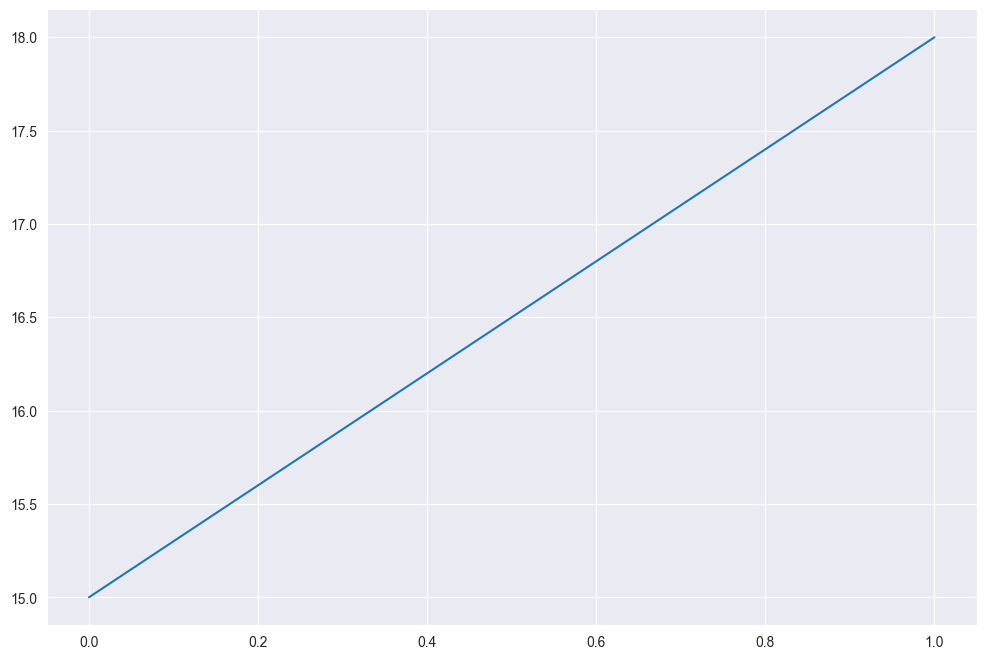

In [8]:
#Plot a 1-step binomial tree walk
plt.figure(figsize = (12,8))
plt.plot([15,one_step_tree(15, .2, -.1, .6)])
plt.show()

Let $u > 0$, $d < 0$, $0 \leq p \leq 1$, and let $K$ be the discrete probability distribution over $\{u, d\}$ with probability density function  
$$
p(u) = p, \quad p(d) = 1 - p.
$$

The **2-step binomial tree model** with initial value $S_0$ evolves as follows:

- After the first step:  
$$
S_1 =
\begin{cases}
S_0(1 + u) & \text{with probability } p, \\
S_0(1 + d) & \text{with probability } 1 - p.
\end{cases}
$$

- After the second step:  
$$
S_2 =
\begin{cases}
S_0(1 + u)^2 & \text{with probability } p^2, \\
S_0(1 + u)(1 + d) & \text{with probability } 2p(1 - p), \\
S_0(1 + d)^2 & \text{with probability } (1 - p)^2.
\end{cases}
$$


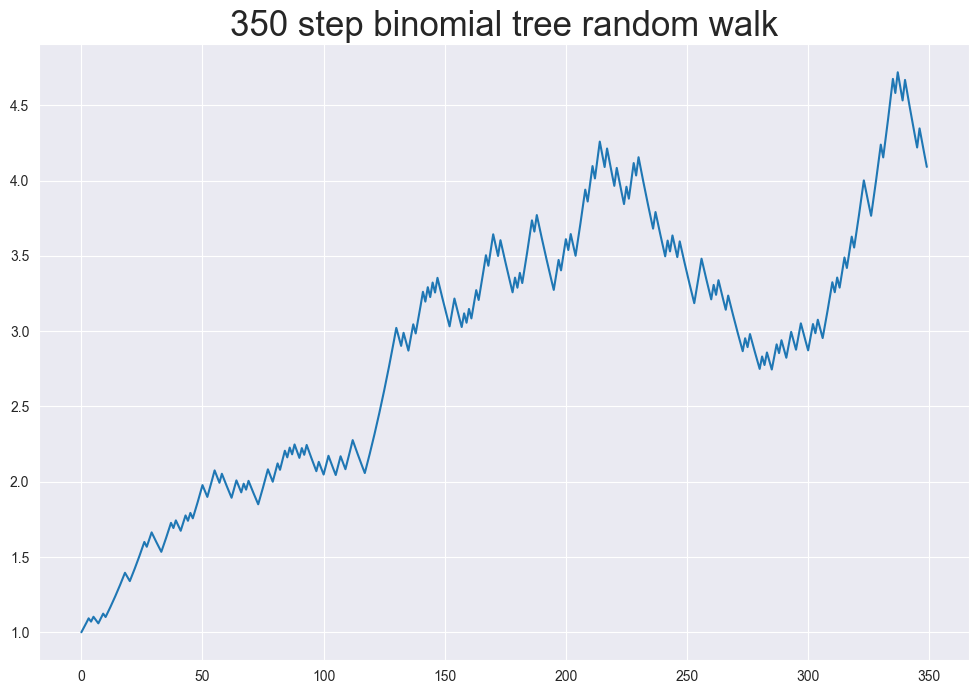

In [22]:
# Create a random walk of length 10 using 10-steps from the 1-step binomial tree model

n = 350
S0 = 1
steps = np.zeros(n) 
steps[0] = S0
u = .03
d = -.02
p = .5

for i in range(1,n):
    steps[i] = one_step_tree(steps[i-1],u,d,p)

plt.figure(figsize = (12,8))
plt.title(f'{n} step binomial tree random walk', size = 25)
plt.plot(steps)
plt.show()

Let $u > 0$, $d < 0$, $0 \leq p \leq 1$, and let $K$ be the discrete probability distribution over $\{u, d\}$ with probability density function  
$$
p(u) = p, \quad p(d) = 1 - p.
$$

The **$n$-step binomial tree model** describes the evolution of an asset price over $n$ time steps. Starting from an initial value $S_0$, the asset price at step $t$ is given by  
$$
S_t = S_0 (1 + r_1)(1 + r_2) \cdots (1 + r_t),
$$  
where each $r_i$ is independently drawn from the distribution $K$.

Equivalently, after $n$ steps, the asset price can be expressed as  
$$
S_n = S_0 (1 + u)^k (1 + d)^{n - k},
$$  
where $k$ is the number of up moves and $n - k$ is the number of down moves. The probability of observing $k$ up moves (and hence $n - k$ down moves) is given by the binomial distribution:
$$
P(k \text{ up moves}) = \binom{n}{k} p^k (1 - p)^{n - k}.
$$



**Estimating Geometric Brownian Motion**


Assume that the distribution of stock paths from time $t=0$ to $t=1$ is the limit of $n$-step binomial tree models whose up and down factors have probability $1/2$. Let $\sigma$ be the standard deviation of the log returns of the stock paths and $\mu$ the log expected value $S_1$. Let $\zeta$ be the probability distribution over $\{1/\sqrt{n}, -1/\sqrt{n}\}$ each with probability $1/2$. Then the stock price at time $t = 1$ has distribution $e^{\mu + \sigma W}$ where $W = \zeta(1) + \zeta(2) + \cdots + \zeta(n)$. 

In [23]:
print('In the following, we use the solution to limit described above which is accomplished by solving a stochastic partial differential equation.')

In the following, we use the solution to limit described above which is accomplished by solving a stochastic partial differential equation.


### Remark about the limiting behavior

The following functions estimate random walks by approximating geometric brownian motions through either a continuous or discrete approximation. 

We'll go over the convergence of the "symmetric random walk," or the $W = \zeta(1) + \zeta(2) + \cdots + \zeta(n)$ part of the above in the next class and how the term $-.5\sigma$ shows up in the limiting process.

In [36]:
def brown_motion_path_discrete(S0, sigma, mu, n):
    dt = 1/n
    zeta = np.random.choice([1,-1], size = n, p = [.5,.5])/np.sqrt(n)
    W = np.cumsum(zeta)
    t = np.linspace(dt, 1, n)

    exponent = (mu - .5*sigma**2)*t + sigma*W
    steps = np.empty(n+1)
    steps[0] = S0
    steps[1:] = S0*np.exp(exponent)
    
    return steps



In [35]:
def brown_motion_path_continuous(S0, sigma, mu, n):
    dt = 1/n
    zeta = np.random.normal(loc = 0, size = n)/np.sqrt(n)
    W = np.cumsum(zeta)
    t = np.linspace(dt, 1, n)

    exponent = (mu - .5*sigma**2)*t + sigma*W
    steps = np.empty(n+1)
    steps[0] = S0
    steps[1:] = S0*np.exp(exponent)
    
    return steps


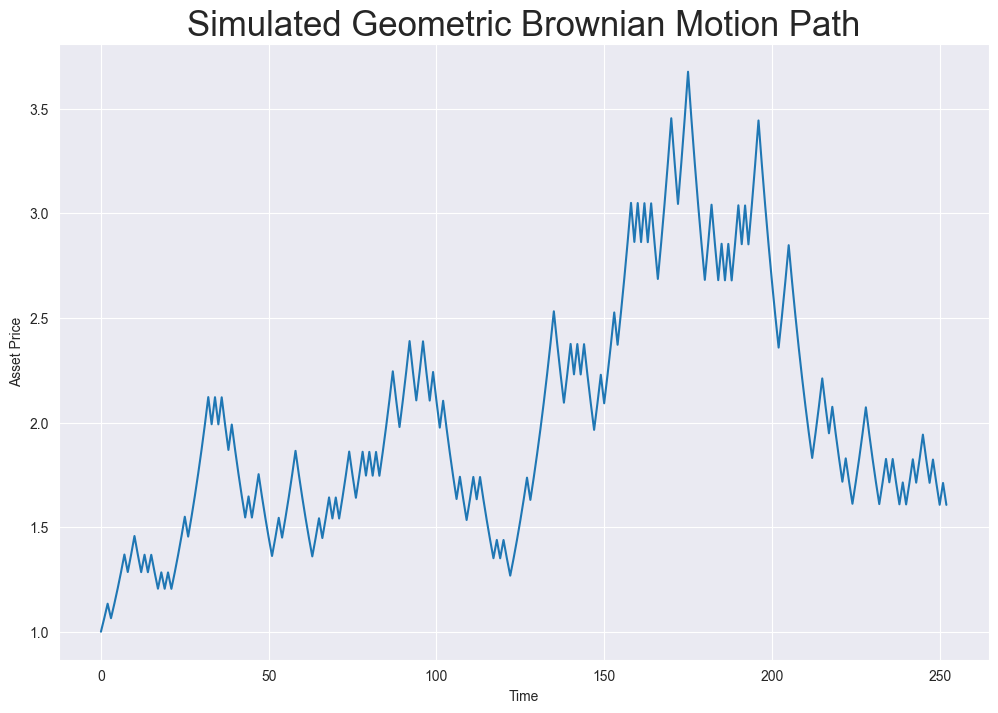

In [45]:
# Simulation of stock path as using discrete approximation by geometric brownian motion
np.random.seed(2)

n = 252
S0 = 1
sigma = 0.4 
mu = .05
path = brown_motion_path_discrete(S0, sigma, mu,n)


plt.figure(figsize = (12,8))
plt.plot(np.linspace(0, n, n + 1), path)
plt.title("Simulated Geometric Brownian Motion Path", size = 25)
plt.xlabel("Time")
plt.ylabel("Asset Price")
plt.show()

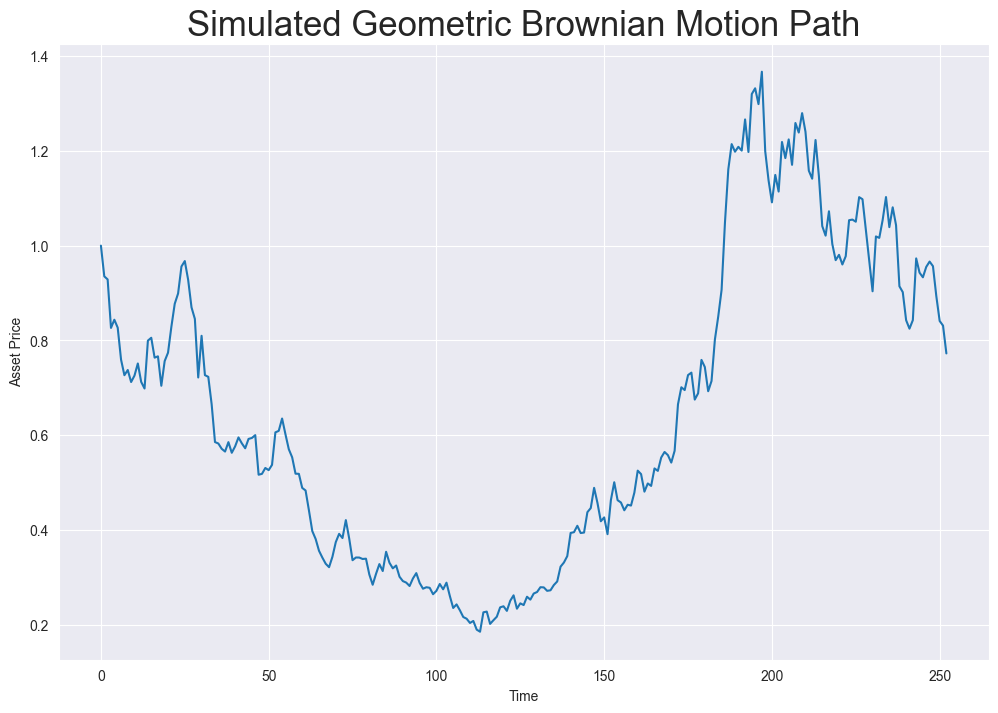

In [46]:
# Simulation of stock path as continuous geometric brownian motion


n = 252
S0 = 1
sigma = 0.4 
mu = .05
path = brown_motion_path_continuous(S0, sigma, mu,n)


plt.figure(figsize = (12,8))
plt.plot(np.linspace(0, n, n + 1), path)
plt.title("Simulated Geometric Brownian Motion Path", size = 25)
plt.xlabel("Time")
plt.ylabel("Asset Price")
plt.show()